## Trabajo semanal 4 - Entrega 23/5
### Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:

ω0=2π 22 kHz
Q=5
Aproximación Chebyshev con ripple de 0,5 dB
También se sabe que la transferencia del filtro debe ser:

T(fS1)=-16 dB para fS1=17 kHz
T(fS2)=-24 dB para fS2=36 kHz

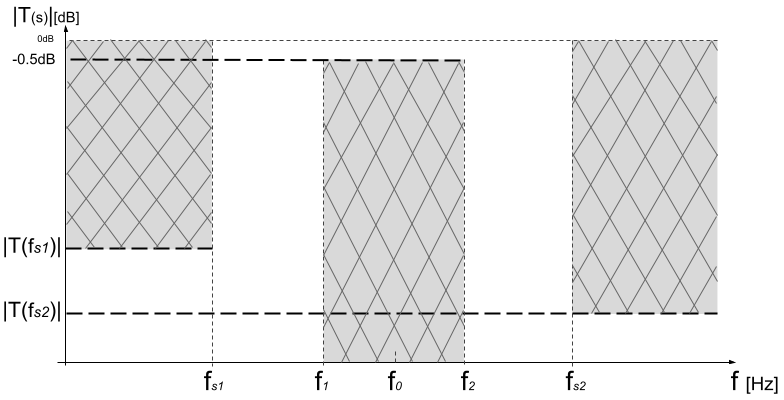

### Consignas de la actividad:

👉  Obtener la plantilla de diseño pasabanda normalizada

👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

👉  Obtener la transferencia pasabanda normalizada

👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

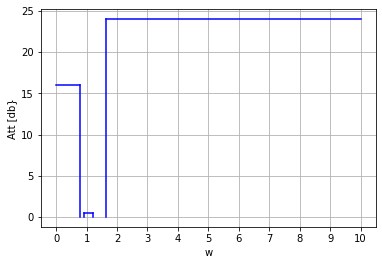

In [5]:
"""
Created on Sat May 21 14:13:04 2022

@author: marti
"""

# Obtener plantilla de pasabanda

import numpy as np
import matplotlib.pyplot as plt

w_banda_paso = np.linspace(0.9, 1.2)  
w_banda_att_1 = np.linspace(0, 0.772727)  
w_banda_att_2 = np.linspace(1.63, 10) 
att_min1 = 16 # dB
att_min2 = 24 # dB
att_max = 0.5  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att1 = np.linspace(0, att_min1)
vertical_banda_att2 = np.linspace(0, att_min2)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 11)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-b')
ax.plot(w_banda_att_1, [att_min1] * len(w_banda_att_1), '-b')
ax.plot(w_banda_att_2, [att_min2] * len(w_banda_att_2), '-b')
ax.plot([0.9] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([1.2] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([0.772727] * len(vertical_banda_att1), vertical_banda_att1, '-b')
ax.plot([1.63] * len(vertical_banda_att2), vertical_banda_att2, '-b')

plt.show()

### Prototipo Pasabanda  

| ⍺máx [dB] | ⍺mín1 [dB] | ⍺mín2 [dB] | Wo | Ws1 | Ws2 |
|:----------------:|:-----------------:|:-----------------:|:-------:|:----------:|:----------:|
|      0,5      |       16    |       24        |    1    |  0,772727  |  1,636363  | 

$ \Omega_{s1} = Q \cdot \frac{W_{s1}^2 - 1}{W_{s1}} = -2,607 $  
$ \Omega_{s2} = Q \cdot \frac{W_{s2}^2 - 1}{W_{s2}} = -6,9849 $  

### Prototipo Pasabajos
| ⍺máx [dB] | ⍺mín [dB] | W0  | Ws  |
| --------- | --------- | ------- | ------- |
| 0,5 | 24 | 1 | 2,607 |

### Diseño de Chebyshev
$ \epsilon^2 = 10^{\frac{\alpha_{max}}{10}} - 1 = 10^{\frac{0,5}{10}} - 1 = 0,122 $  
$ \alpha_{min} = 24 dB <= 10 log{1 + \epsilon^2 \cdot cosh{(n \cdot cosh(W_s)^{-1})}^2} $  
N = 3 -> 33 dB

In [13]:
import math as m

alpha_max = 0.5    # dB
alpha_min = 24   # dB
w_s_lp = 2.607

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')

epsilon: 0.34931140018894796, N: 3


### Calculo de Chebyshev

$ C_0 = 1 $  
$ C_1 = W $  
$ C_2 = 2W^2 - 1 $  
$ C_3 = 2W \cdot C_2 = 2W \cdot (2W^2 - 1) = 4W^3 - 3W $  

$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot (4W^3 - 3W)^2} $  
$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot (16W^6 - 24W^4 + 9W^2)} $  
$ |T(s)|^2_{W = \frac{s}{j}} = \frac{1}{-16 \epsilon^2 s^6 - 24 \epsilon^2 s^4 - 9 \epsilon^2 s^2 + 1} $  
$ |T(s)|^2 = T(s) \cdot T(-s) = \frac{1}{a s^3 + b s^2 + c s + d} \cdot \frac{1}{-a s^3 + b s^2 - c s + d} $    

In [19]:
import numpy as np

epsilon = 0.34931140018894796

x = 1/(-16 * epsilon**2)

print(x)


coeff = [-16 * epsilon**2, 0, -24 * epsilon**2, 0, -9 * epsilon**2, 0 , 1]
np.roots(coeff)



-0.5122176014894358


array([-0.31322824+1.02192749j, -0.31322824-1.02192749j,
        0.31322824+1.02192749j,  0.31322824-1.02192749j,
       -0.62645649+0.j        ,  0.62645649+0.j        ])

$ |T(s)|^2 =  \frac{1}{-16 \epsilon^2 (s + 0,313 + j 1,0219) (s + 0,313 - j 1,0219) (s - 0,313 + j 1,0219) (s - 0,313 - j 1,0219) (s + 0,626) (s - 0,626)} $    
$ |T(s)|^2 =  \frac{\frac{1}{-16 \epsilon^2 }}{(s + 0,313 + j 1,0219) (s + 0,313 - j 1,0219) (s - 0,313 + j 1,0219) (s - 0,313 - j 1,0219) (s + 0,626) (s - 0,626)} $    
$ T(s) = \frac{A}{(s - 0,313 + j 1,0219) (s - 0,313 - j 1,0219)(s + 0,626)} $  
$ T(-s) = \frac{B}{(s + 0,313 + j 1,0219) (s + 0,313 - j 1,0219)(s - 0,626)} $  
$ T(s) = \frac{A}{(s^2 + 0,626 s + 0,313^2 + 1,0219^2) (s - 0,626)} $   
$ T(s) = \frac{A}{(s^2 + 0,626 s + 1,1422) (s - 0,626)} $   
$ T(s) = \frac{A}{(s^3 - 0,626 s^2 + 0,626 s^2 + 1,1422 s - 0,626^2 s + 1,1422 s - 0,715)} $   
$ T(s) = \frac{A}{(s^3 + 1,252 s^2  + 1,5343 s + 0,715)} $   
$ T(-s) = \frac{B}{(-s^3 + 1,252 s^2  - 1,5343 s + 0,715)} $   

In [23]:
A = 1/(4 * epsilon)
B = - 1/(4 * epsilon)
C = 1.1422 * 0.626

print(f"A: {A}, B: {B}, C: {C} ")

A: 0.7156937903107975, B: -0.7156937903107975, C: 0.7150172 


$ A = \frac{1}{4 \epsilon} = 0,716 $     
$ B =- \frac{1}{4 \epsilon} = -0,716 $   
$ W_{o1}^2 \cdot W_{02} = 0,716 $  
$ T_1(s) = \frac{1,1422}{s^2 + 0,626 s + 1,1422} $   
$ T_2(s) = \frac{0,626}{(s + 0,626)} $   

### Transformación pasabanda

$ p = Q \cdot \frac{s^2 + 1}{s} $  
$ T_1(Q \cdot \frac{s^2 + 1}{s}) = \frac{1,1422}{({Q \cdot \frac{s^2 + 1}{s}})^2 + 0,626 (Q \cdot \frac{s^2 + 1}{s}) + 1,1422} $    
$ T_1(s) = \frac{1,1422}{Q^2 \cdot \frac{s^4 + 2 s^2 + 1}{s^2} + 0,626 (Q \cdot \frac{s^2 + 1}{s}) + 1,1422} $   
$ T_1(s) = \frac{1,1422}{\frac{Q^2 \cdot (s^4 + 2 s^2 + 1) + 0,626 \cdot Q \cdot (s^2 + 1) \cdot s + 1,1422 s^2}{s^2}} $   
$ T_1(s) = \frac{1,1422 \cdot s^2}{Q^2 \cdot (s^4 + 2 s^2 + 1) + 0,626 \cdot  Q \cdot (s^3 + s) + 1,1422 s^2} $   
$ T_1(s) = \frac{1,1422 \cdot s^2}{Q^2 s^4 + 2 Q^2 s^2 + Q^2 + 0,626 Q s^3 + 0,626 Q s + 1,1422 s^2} $   
$ T_1(s) = \frac{1,1422 \cdot s^2}{Q^2 s^4 + 0,626 Q s^3 + (2 Q^2 + 1,1422) s^2 + 0,626 Q s + Q^2} $   
$ Q = 5 $  
$ T_1(s) = \frac{1,1422 \cdot s^2}{25 s^4 + 3,13 s^3 + 51,1422 s^2 + 3,13 s + 25} $   


$ T_2(Q \cdot \frac{s^2 + 1}{s}) = \frac{0,626}{(Q \cdot \frac{s^2 + 1}{s} + 0,626)} $    
$ T_2(Q \cdot \frac{s^2 + 1}{s}) = \frac{0,626 s}{Q \cdot (s^2 + 1) + 0,626 s} $    
$ T_2(Q \cdot \frac{s^2 + 1}{s}) = \frac{0,626 s}{Q s^2 + 0,626 s + Q} $    
$ T_2(Q \cdot \frac{s^2 + 1}{s}) = \frac{\frac{0,626}{Q} s}{s^2 + \frac{0,626}{Q} s + 1} $    
$ Q = 5 $   
$ T_2(Q \cdot \frac{s^2 + 1}{s}) = \frac{\frac{0,626}{5} s}{s^2 + \frac{0,626}{5} s + 1} $    
$ T_2(Q \cdot \frac{s^2 + 1}{s}) = \frac{\frac{1}{7,9872} s}{s^2 + \frac{1}{7,9872} s + 1} $    
$ Q_2 = 7,9872 $    $ W_{o2} = 1 $  

In [26]:
# Polos de T1

coeff = [25, 3.13, 51.1422, 3.13, 25]
np.roots(coeff)

array([-0.03448343+1.10691283j, -0.03448343-1.10691283j,
       -0.02811657+0.90253759j, -0.02811657-0.90253759j])

$ T_1(s) = T_4(s) \cdot T_3(s) $  
$ T_1(s) = \frac{1,1422 \cdot s^2}{25 \cdot (s + 0,03448 + j 1,107) (s + 0,03448 - j 1,107) (s + 0,02812 + j 0,9025) (s + 0,02812 - j 0,9025)} $  
$ T_4(s) = \frac{A \cdot s}{(s + 0,03448 + j 1,107) (s + 0,03448 - j 1,107)} $  
$ T_4(s) = \frac{A \cdot s}{s^2 + 0,06896 s + 0,03448^2 + 1,107^2} $  
$ T_4(s) = \frac{A \cdot s}{s^2 + 0,06896 s + 1,2266} $  
$ T_3(s) = \frac{B \cdot s}{(s + 0,02812 + j 0,9025) (s + 0,02812 - j 0,9025)} $  
$ T_3(s) = \frac{B \cdot s}{s^2 + 0,05624 s + 0,02812^2 + 0,9025^2} $  
$ T_3(s) = \frac{B \cdot s}{s^2 + 0,05624 s + 0,8153} $  


$ C = \frac{1,1422}{25} = 0,045688 $  
$ C = A \cdot B $  
$ C = 0,06896 \cdot 0,05624 = 3,808 x10^{-3} $  
Tengo una $ K = 11,817 $  
Voy a tener que colocar un no inversor para amplificar

$ T(s) = \frac{\frac{1}{7,9872} s}{s^2 + \frac{1}{7,9872} s + 1} \cdot \frac{0,06896 \cdot s}{s^2 + 0,06896 s + 1,2266} \cdot \frac{0,05624 \cdot s}{s^2 + 0,05624 s + 0,8153} \cdot K $

### Implementación como redes pasivas separadas

Primer transferencia:  $ W_0 = 1  Q = 7,9872 $  
$ R = 1, C = \frac{1}{Q} , L = Q $  
$ R = 1, C = 0,1252 , L = 7,9872 $  

Segunda transferencia:  $ W_0 = 1,107  Q = 16,06 $  
$ R = 1, C = \frac{1}{Q \cdot W_0} , L = \frac{Q}{W_0} $  
$ R = 1, C = 0,05625 , L = 14,5 $  

Tercer transferencia:  $ W_0 = 0,903  Q = 16,06 $  
$ R = 1, C = \frac{1}{Q \cdot W_0} , L = \frac{Q}{W_0} $  
$ R = 1, C = 0,06896 , L = 17,785 $  

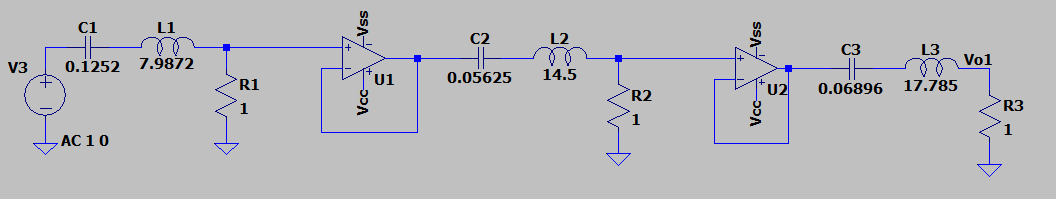

Esta implementación no me sirve si despues quiero activar los inductores, asi que me conviene optar por:
Primer transferencia:  $ W_0 = 1  Q = 7,9872 $  
$ R = 1, L = \frac{1}{Q} , C = Q $  
$ R = 1, L = 0,1252 , C = 7,9872 $  

Segunda transferencia:  $ W_0 = 1,107  Q = 16,06 $  
$ R = 1, L = \frac{1}{Q \cdot W_0} , C = \frac{Q}{W_0} $  
$ R = 1, L = 0,05625 , C = 14,5 $  

Tercer transferencia:  $ W_0 = 0,903  Q = 16,06 $  
$ R = 1, L = \frac{1}{Q \cdot W_0} , C = \frac{Q}{W_0} $  
$ R = 1, L = 0,06896 , C = 17,785 $  

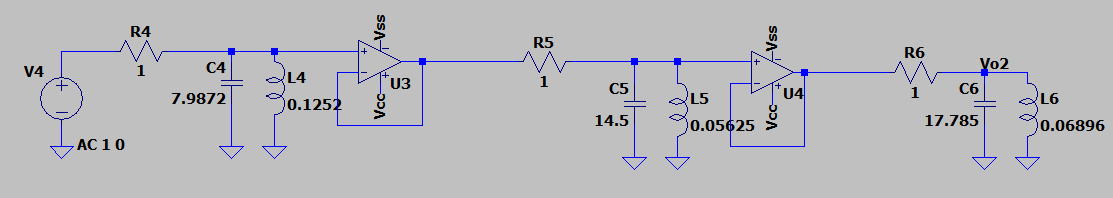

#### Desnormalizar
$ R^D = 1 k $  
$ L_1^D = L \cdot \frac{\Omega_z}{\Omega_w} =  0,1252 \cdot \frac{1k}{2 \pi 22 kHz} = 905,74 \mu Hy $  
$ L_2^D = L \cdot \frac{\Omega_z}{\Omega_w} = 0,05625 \cdot \frac{1k}{2 \pi 22 kHz} = 406,93 \mu Hy $  
$ L_3^D = L \cdot \frac{\Omega_z}{\Omega_w} = 0,06896 \cdot \frac{1k}{2 \pi 22 kHz} = 498,878 \mu Hy $  
$ C_1^D = C \cdot \frac{1}{\Omega_z \cdot \Omega_w} = 7,9872 \cdot \frac{1}{1k \cdot 2 \pi 22 kHz} = 57,782 nF $  
$ C_2^D = C \cdot \frac{1}{\Omega_z \cdot \Omega_w} = 14,5 \cdot \frac{1}{1k \cdot 2 \pi 22 kHz} = 104,9 nF $  
$ C_3^D = C \cdot \frac{1}{\Omega_z \cdot \Omega_w} = 17,785 \cdot \frac{1}{1k \cdot 2 \pi 22 kHz} = 228,662 nF $  
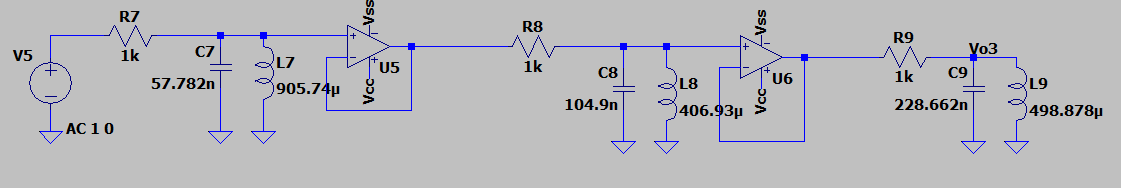


Me falta el no inversor que antes ya habia calculado que necesitaba amplificar 11,82
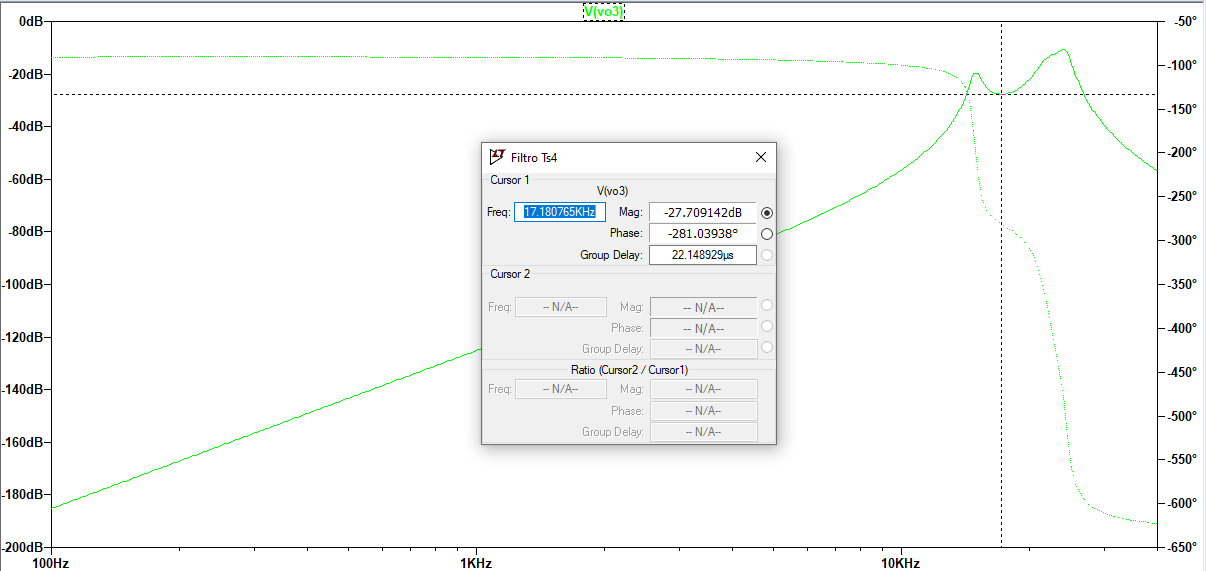
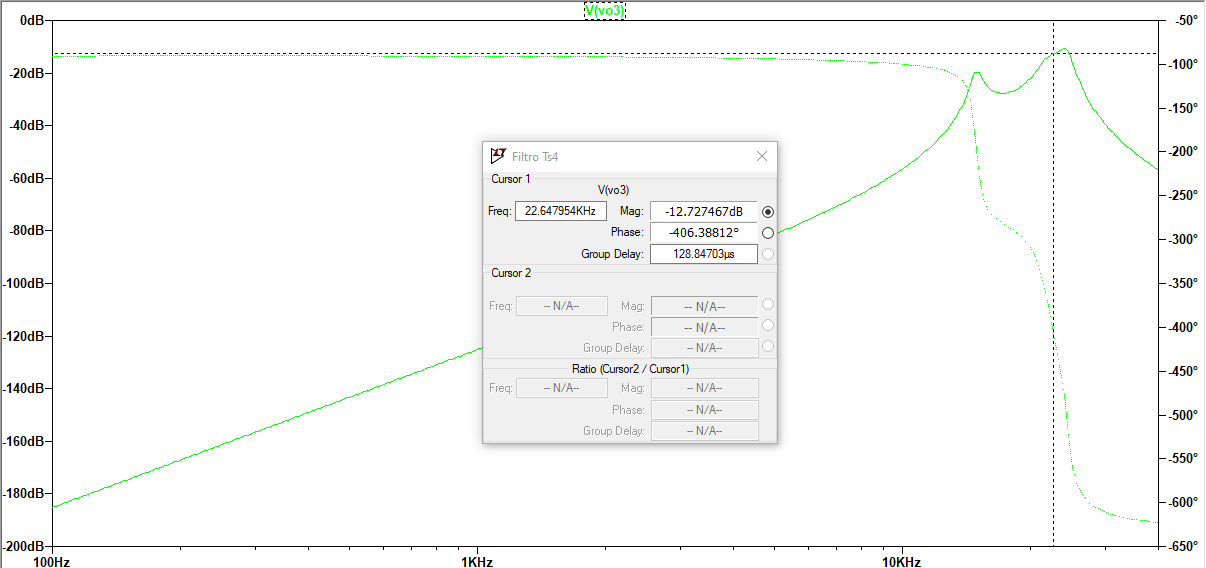
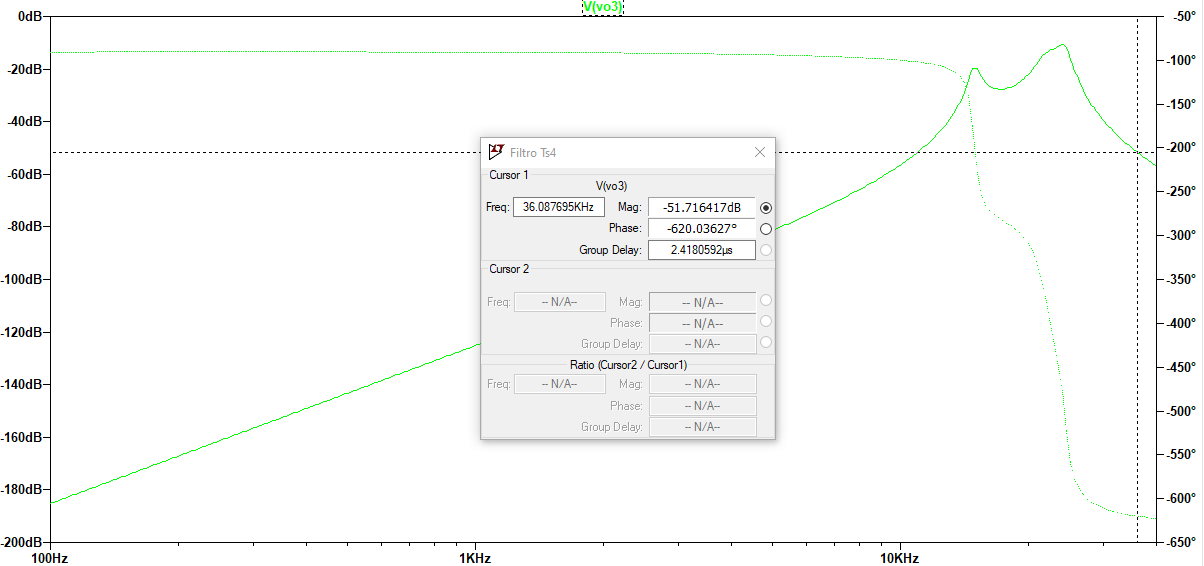

#### Circuito final
Agrego un no inversor de ganancia 4 para mejorar el funcionamiento (no se justificar porque es necesario)
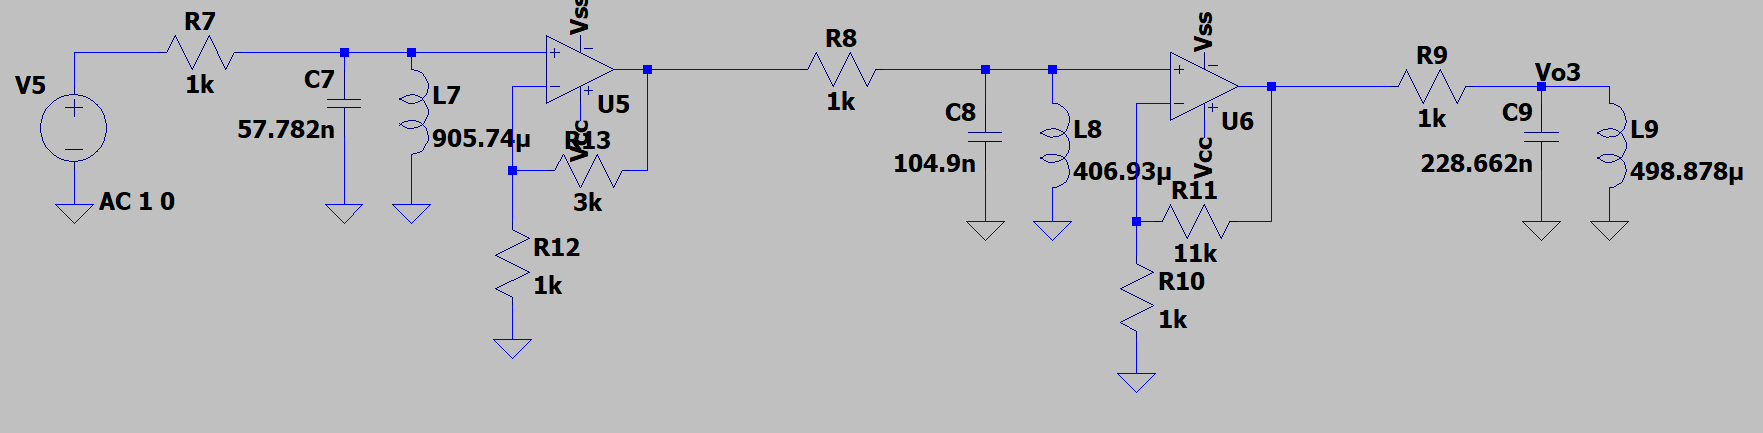
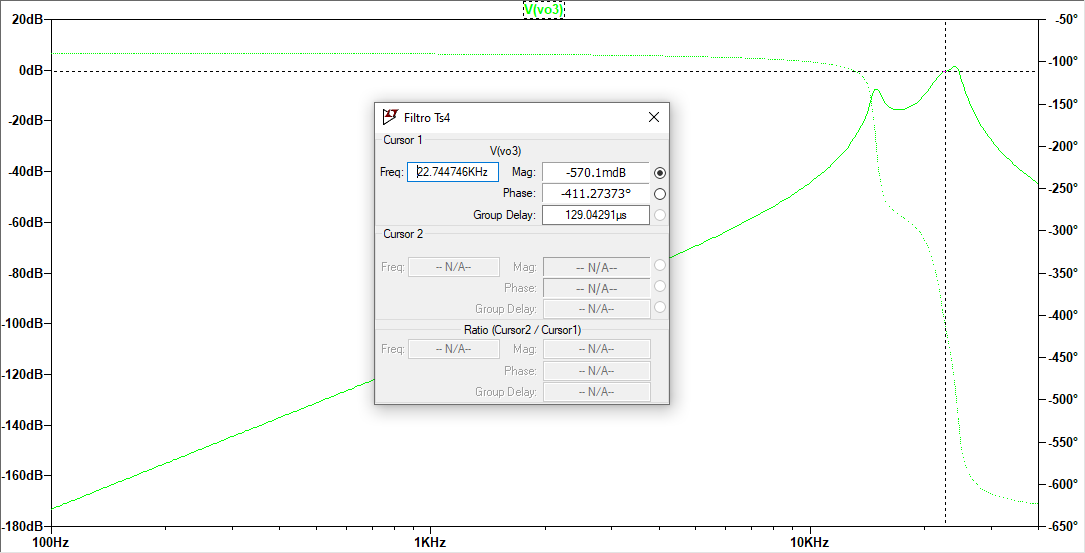
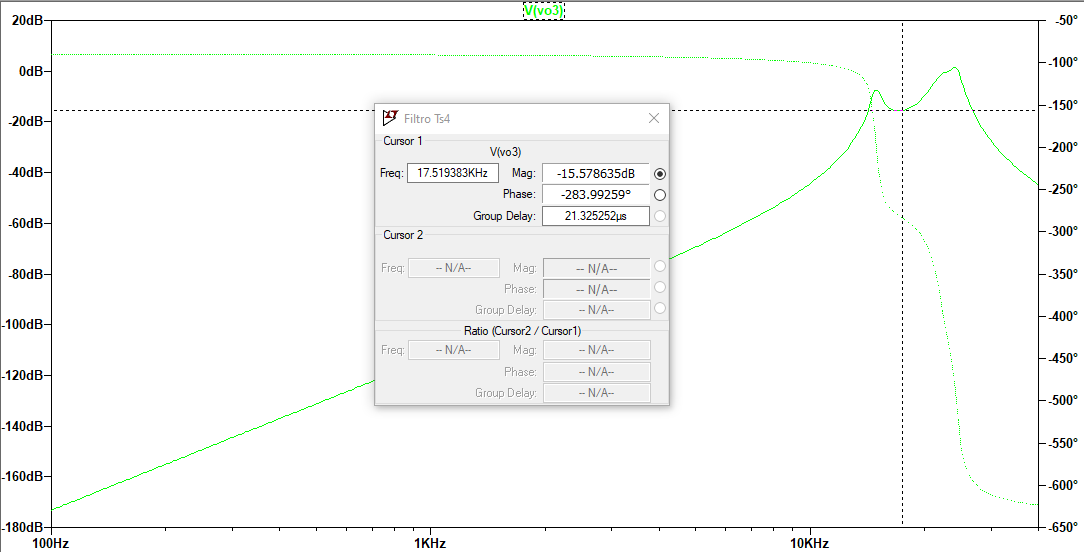
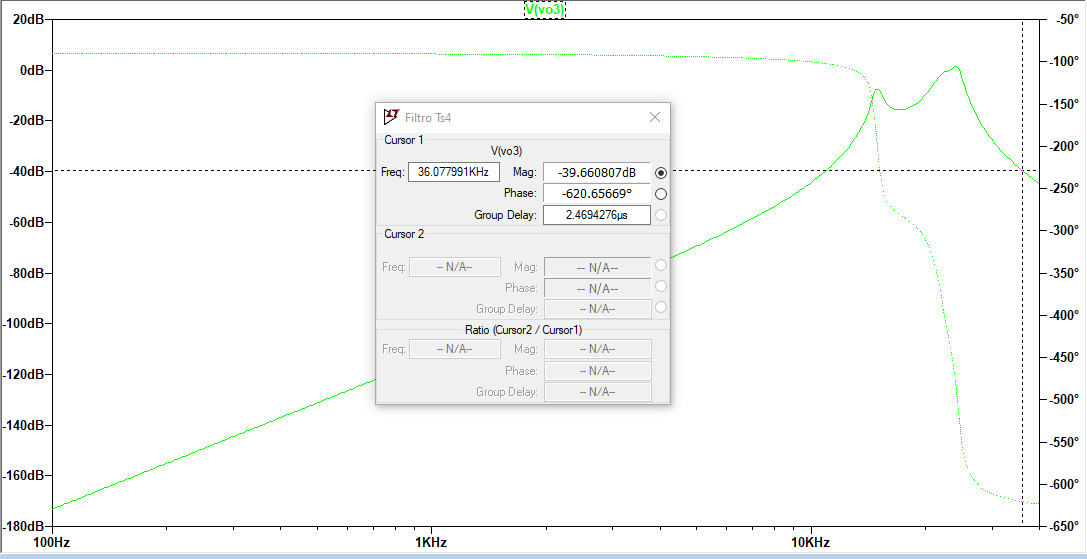

### Activando los inductores

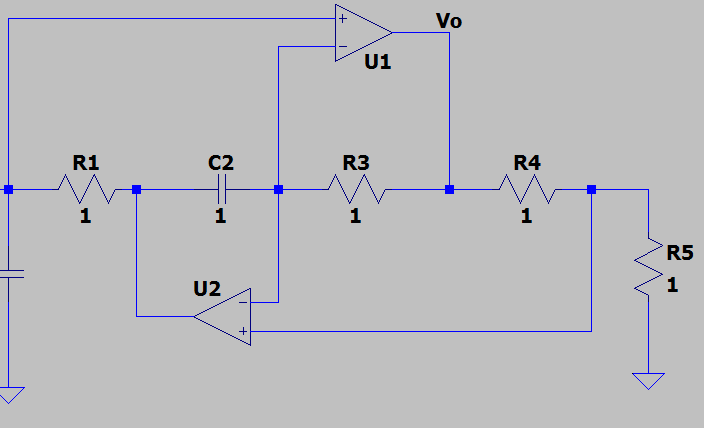
Primer filtro:
$ R_4 $ y $ R_5 $ los voy a usar para la ganancia de 4 que tenía en el primer no inversor
$ R_4 = 1k R_5 = 1K $  
Pero en este caso voy a distribuir esa ganancia 4 en ganancia 2 en el primer filtro y otra ganancia 2 en el último filtro

$ L^D_1 = 905,74\mu Hy $  
$ L^D_1 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_1 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 950 $  
$ C = 1000 pF $  

Segundo filtro:
$ R_4 = 11k R_5 = 1K $  

$ L^D_2 = 406,93\mu Hy $  
$ L^D_2 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_2 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 1000 $  
$ C = 400 pF $  

Tercer filtro:
$ R_4 $ y $ R_5 $ los voy a usar para la ganancia de 2 para completar la ganancia 4 que tenia antes
$ R_4 = 1k R_5 = 1K $  

$ L^D_3 = 498,878\mu Hy $  
$ L^D_3 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_3 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 1000 $  
$ C = 500 pF $  
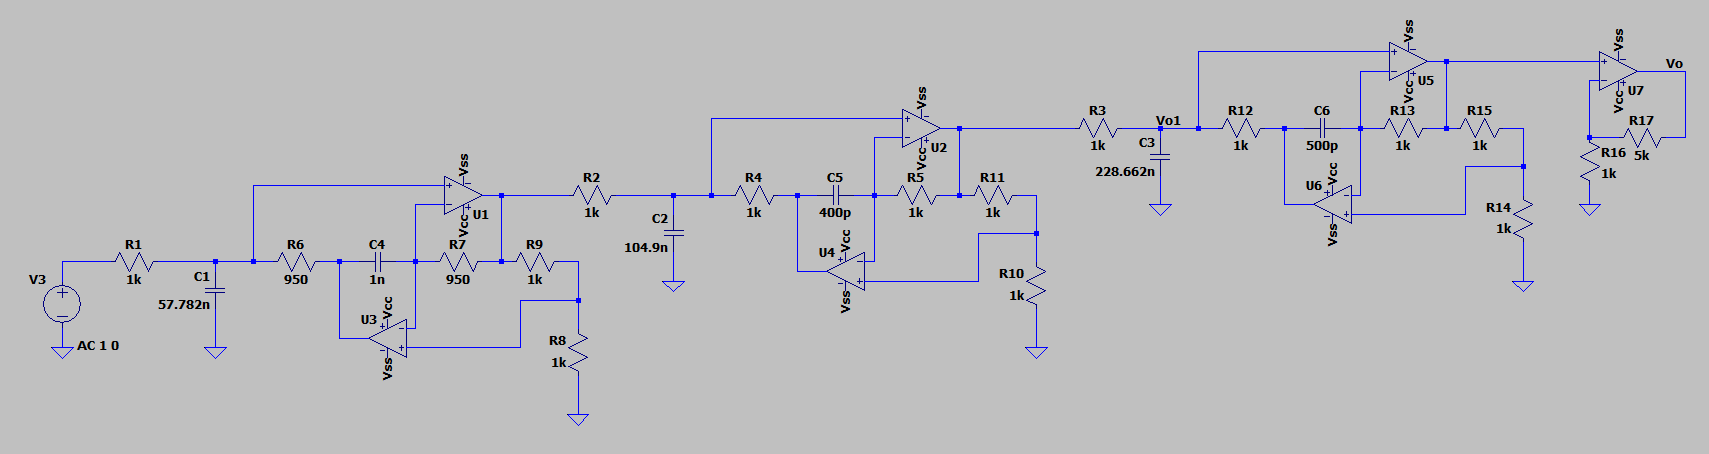
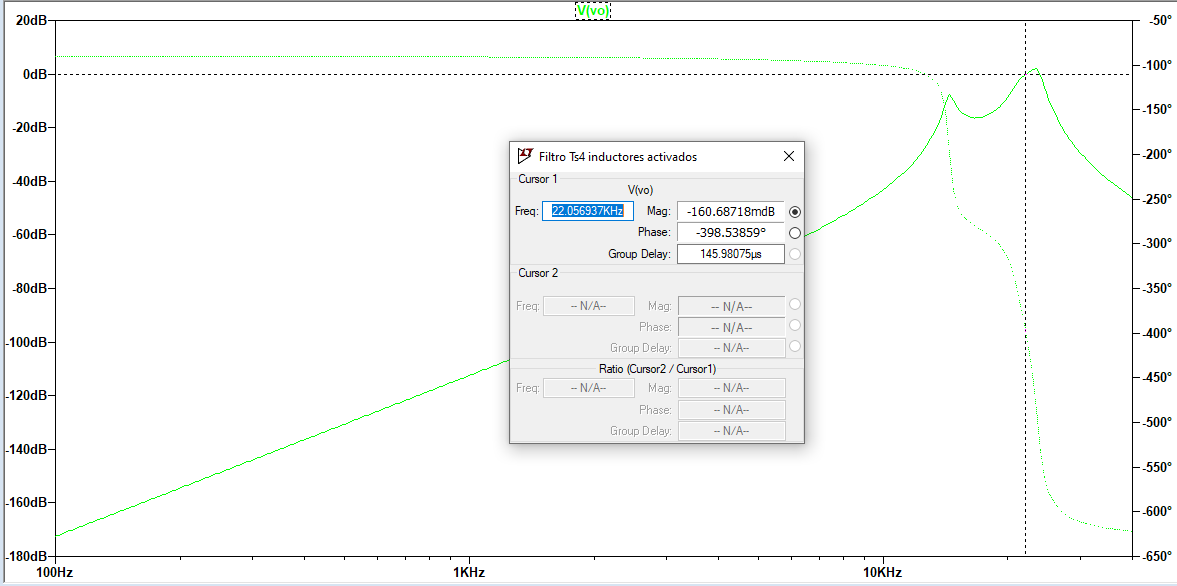
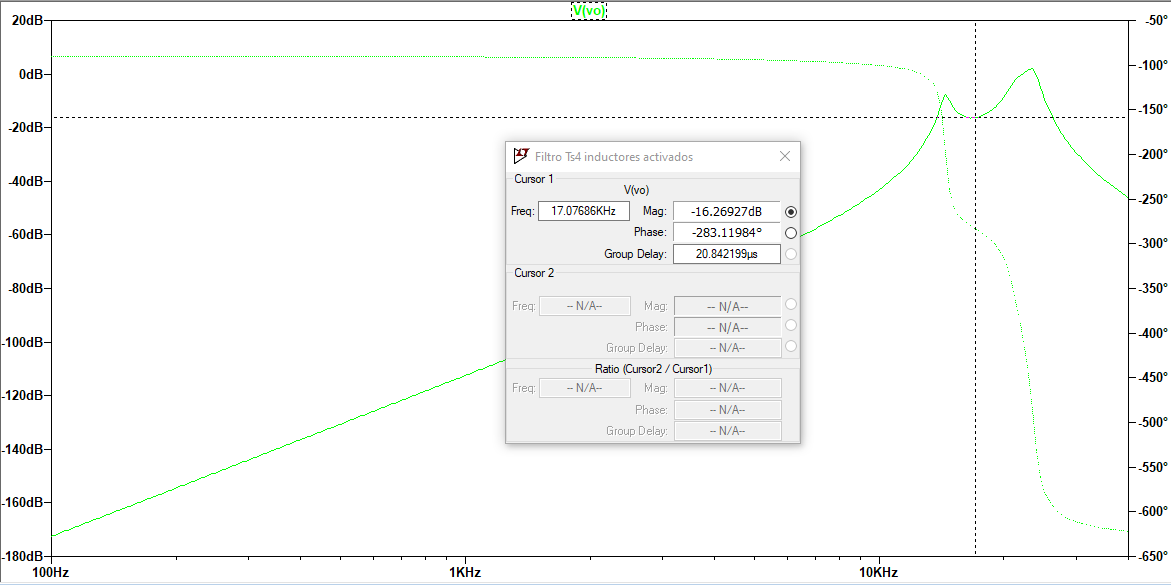
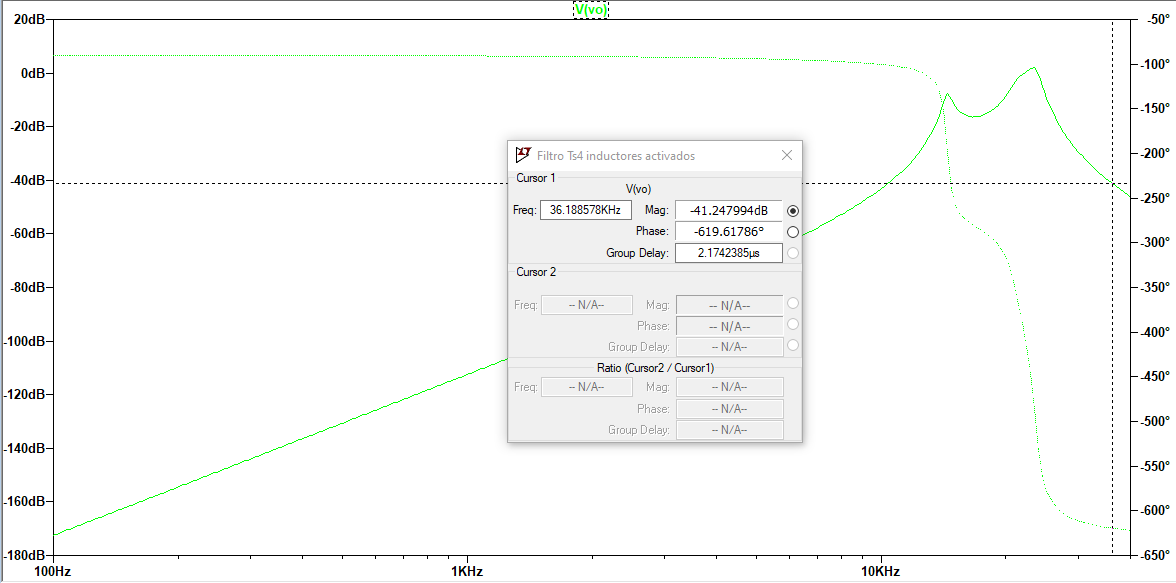